# Sentiment Analysis Thing

In [20]:
import pandas as pd

# Download the test data
test_data_url = "https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/test.tsv"
# Download and load the train data:
train_data_url = 'https://raw.githubusercontent.com/google-research/google-research/2adf640a14f11025ae5a9d0ec493b78530d276d3/goemotions/data/train.tsv'
# Download and load the validation data:
dev_data_url = 'https://raw.githubusercontent.com/google-research/google-research/2adf640a14f11025ae5a9d0ec493b78530d276d3/goemotions/data/dev.tsv'

# Load the files into dataframes
train_data = pd.read_csv(train_data_url, sep='\t')
dev_data = pd.read_csv(dev_data_url, sep='\t')
test_data = pd.read_csv(test_data_url, sep='\t')

# Data Understanding

## Checking each dataset

In [21]:
# Checking each dataset
train_data.head(2)

,My favourite food is anything I didn't have to cook myself.,27,eebbqej
0,"Now if he does off himself, everyone will thin...",27,ed00q6i
1,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj


In [22]:
dev_data.head(2)

,Is this in New Orleans?? I really feel like this is New Orleans.,27,edgurhb
0,"You know the answer man, you are programmed to...","4,27",ee84bjg
1,I've never been this sad in my life!,25,edcu99z


In [23]:
test_data.head(2)

,"I’m really sorry about your situation :( Although I love the names Sapphira, Cirilla, and Scarlett!",25,eecwqtt
0,It's wonderful because it's awful. At not with.,0,ed5f85d
1,"Kings fan here, good luck to you guys! Will be...",13,een27c3


## Describing the Shapes

In [24]:
# checking shapes
print("train_data", train_data.shape)

train_data (43409, 3)


In [25]:
print("dev_data", dev_data.shape)

dev_data (5425, 3)


In [26]:
print("test_data", test_data.shape)

test_data (5426, 3)


## Adding a header

We will use only train_data for data understanding.

We add a header to train_data since it does not have one.

In [27]:
header = ["comment", "emotion", "id"]
# Add header to test data
train_data.columns = header
# Print the data now
train_data.head(4)

,comment,emotion,id
0,"Now if he does off himself, everyone will thin...",27,ed00q6i
1,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
2,To make her feel threatened,14,ed7ypvh
3,Dirty Southern Wankers,3,ed0bdzj


# Understanding Emotions

We have 28 emotions?

In [28]:
# Check emotions in the code. the "emotion" column
train_data.emotion.unique()

array(['27', '2', '14', '3', '26', '15', '8,20', '0', '6', '1,4', '5',
       '3,12', '6,22', '6,9,27', '12', '16,25', '2,7', '17', '25', '0,15',
       '15,18', '16,27', '7,13', '10', '20', '4', '13,15', '0,1', '13',
       '1', '0,5', '0,13,15', '9', '4,22', '24', '18', '7', '6,7', '22',
       '9,27', '4,5', '2,3', '0,8,15,17', '11', '7,15', '3,9,26', '13,18',
       '23', '1,27', '7,18', '10,22', '4,15', '0,26', '10,27', '1,26',
       '5,27', '8,27', '17,20', '10,20', '3,24', '2,27', '4,8', '3,27',
       '0,7', '8,18', '17,26', '3,9', '21', '18,27', '0,4', '4,7', '0,20',
       '16', '10,11', '0,1,17', '7,26', '14,26', '17,23', '24,25', '9,25',
       '3,22', '1,18', '1,5', '7,10', '0,18', '3,10', '7,25', '6,9',
       '3,18', '8', '0,27', '3,10,11', '3,6', '0,4,20', '0,25', '19',
       '15,17', '7,27', '25,27', '1,17', '4,17', '0,17', '0,4,26', '2,11',
       '22,27', '1,20', '13,26', '20,26', '15,27', '9,18', '1,25',
       '6,7,9,26', '6,22,27', '5,7', '4,27', '2,10', '2,9,25

### Getting all emotions into a list

In [29]:
train_data.emotion.str.split(',').head(10)
# append all the emotions in the test data in a list but convert each one into integer
emotions = []
for i in train_data.emotion.str.split(','):
    for j in i:
        emotions.append(int(j))
emotions[:10]

[27, 2, 14, 3, 26, 15, 8, 20, 0, 27]

### All emotions into a set to check all emotions available

In [30]:
# There are 28 emotions in the test data
set(emotions)
# Show only 10
list(set(emotions))[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
"""
Below are the 28 emotions in the test data
admiration
amusement
anger
annoyance
approval
caring
confusion
curiosity
desire
disappointment
disapproval
disgust
embarrassment
excitement
fear
gratitude
grief
joy
love
nervousness
optimism
pride
realization
relief
remorse
sadness
surprise
neutral
"""
# Making a dictionary of the emotions
emotions_dict = {
    0: "admiration",
    1: "amusement",
    2: "anger",
    3: "annoyance",
    4: "approval",
    5: "caring",
    6: "confusion",
    7: "curiosity",
    8: "desire",
    9: "disappointment",
    10: "disapproval",
    11: "disgust",
    12: "embarrassment",
    13: "excitement",
    14: "fear",
    15: "gratitude",
    16: "grief",
    17: "joy",
    18: "love",
    19: "nervousness",
    20: "optimism",
    21: "pride",
    22: "realization",
    23: "relief",
    24: "remorse",
    25: "sadness",
    26: "surprise",
    27: "neutral"
}

### Instances with more than one emotion

These are the instances where there is more than one emotion

In [32]:
# Instances with more than 1 emotion
train_data[train_data['emotion'].apply(lambda x: len(x.split(',')) > 1)]

,comment,emotion,id
6,We need more boards and to create a bit more s...,"8,20",ef4qmod
10,"Aww... she'll probably come around eventually,...","1,4",edex4ki
14,"Shit, I guess I accidentally bought a Pay-Per-...","3,12",edivtm3
18,Maybe that’s what happened to the great white ...,"6,22",eczq8zg
19,"I never thought it was at the same moment, but...","6,9,27",efdlhs1
...,...,...,...
43381,"goat handshake denied Personally, I just thin...","14,27",ef2m53x
43382,it's horrid :/,"14,27",edlbr3j
43387,Fuck these trendy hipster joints. Give me my s...,"2,3",ee3nyiy
43394,Sorry I kind of took it like you were flexing ...,"1,24",eelhhzc


### We will remove instances with more than one emotion to make it simple

In [33]:
# Remove instances with more than one emotion from each dataset
clean_train_df = train_data[train_data['emotion'].apply(lambda x: len(x.split(',')) == 1)]

/var/folders/xd/gw_pmm5d23s8dm3h09tn28x00000gn/T/ipykernel_23066/3084032638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Before', 'After'], y=[len(train_data), len(clean_train_df)], palette='viridis')


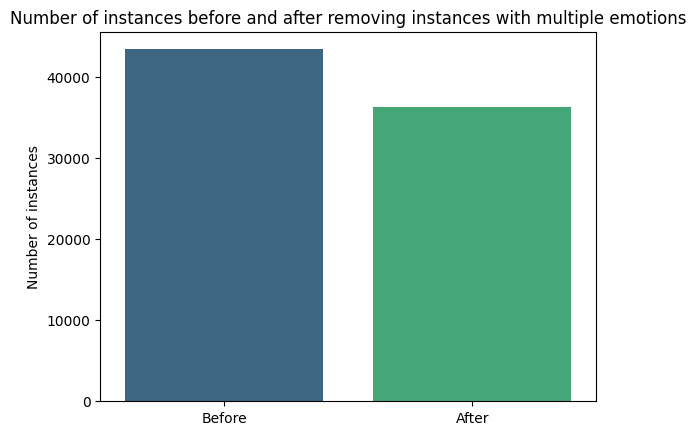

In [34]:
# Plot a barplot with one bar showing the number of instances before removing those with multiple emotions
# and another bar showing the number of instances after removing them
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=['Before', 'After'], y=[len(train_data), len(clean_train_df)], palette='viridis')
plt.title('Number of instances before and after removing instances with multiple emotions')
plt.ylabel('Number of instances')
plt.show()

### Emotion distribution

In [38]:
# Add a column to clean_train_df that maps the emotions to their corresponding string values
clean_train_df.loc[:, 'emotion_str'] = clean_train_df['emotion'].apply(lambda x: emotions_dict[int(x)])

/var/folders/xd/gw_pmm5d23s8dm3h09tn28x00000gn/T/ipykernel_23066/2875208372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


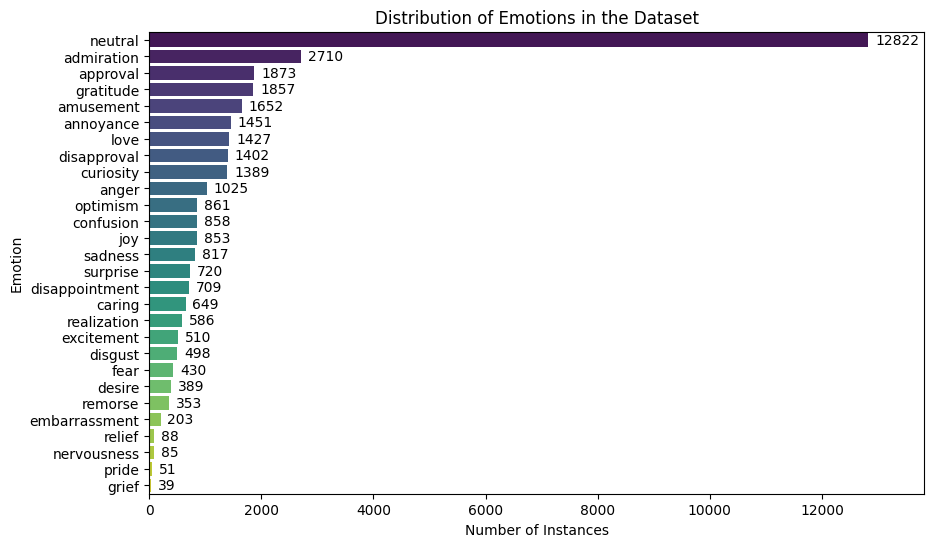

In [62]:
# This will plot the distribution of emotions in the dataset and use emotions_dict
# the emotions should be ordered by the number of instances in the dataset

# emotion value counts
emotion_value_counts = clean_train_df['emotion_str'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y='emotion_str', 
    data=clean_train_df, 
    order=emotion_value_counts.index, 
    palette='viridis'
)

# Add the number of instances at the end of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():.0f}', 
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        xytext=(5, 0),  # Use more offset to ensure the text does not overlap with the bars
        textcoords='offset points'
    )

plt.xlim(0, 13822)

# Set plot title and labels
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Number of Instances')
plt.ylabel('Emotion')
plt.show()